# Optimization Methods MA060002
## Homework 4
By: Darío Slaifstein, PhD-2.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

### 1.
Our objective function $f(x)$ is:
\begin{equation}
f(x)=||z-x||_{2}
\end{equation}
subject to the following constraints:
\begin{equation}
||x-c|| \leq r
\end{equation}

Since the second order norm is not differentiable, due to the square root, we can instead find the optimimum for $f(x)^2$ cause $x^*$ is shared between both functions.

Regarding the constraints, we can re-write them as:

\begin{equation}
|x-c| \leq r
\end{equation}
\begin{equation}
-r \leq x-c \leq r
\end{equation}

Thus we can construct the following Lagrangian function for our problem:
\begin{equation}
L(x, \lambda)=||z-x||_2^2+\lambda.(|x-c|-r)
\end{equation}
\begin{equation}
L(x, \lambda)=\sum_{n=1}^{\infty} [(z_i-x_i)^2 +\lambda.|x_i-c|] - \lambda.r
\end{equation}

With a dual function:
\begin{equation}
d(x)=  \inf_{x} L(x,\lambda)
\end{equation}

Solving this dual problem is just obtaining $\nabla_x L=0$.
\begin{equation}
\nabla_x L=-2(z-x)+\lambda.sign(x-c)
\end{equation}
\begin{equation}
0=-2(z-x^*)+\lambda.sign(x^*-c)
\end{equation}

### 2.
Our Lagrangian function is:
\begin{equation}
L(x, \lambda)=||x-z||_2+\lambda.(a.x-b)
\end{equation}
\begin{equation}
L(x, \lambda)=||x-z||_2+\lambda^T.a.x-b^T.\lambda
\end{equation}
the dual function is the minimum of $L(x,\lambda)$ with respect to $x$ is:
\begin{equation}
d(\lambda)=  \inf_{x} L(x,\lambda)
\end{equation}
\begin{equation}
d(\lambda)=  \inf_{x} ||x-z||_2+\lambda^T.a.x-b^T.\lambda
\end{equation}

Which can be re-written as:
\begin{equation}
   d(\lambda)=   \left\{
\begin{array}{ll}
      -b^T.\lambda & ||A^T.\lambda||_*<1 \\
      -\infty &  ||A^T.\lambda||_* \geq 1\\
\end{array} 
\right.  
\end{equation}

were we used the conjugate norm:
\begin{equation}
d(\lambda)=  \sup_{||u|| \leq 1} u^T.\lambda
\end{equation}
So if we encounter ourselves in the first case, $||A^T.\lambda||_*<1$, the solution to the dual problem is:
\begin{equation}
p^*=-b^T.\lambda
\end{equation}
which is a lower bound of the wanted $x^*$.

### 3. 
We need to solve:
\begin{equation}
\min_{x} f(x)
\end{equation}
\begin{equation}
Ax-b=0
\end{equation}

The conjugate function of our objective function is:
\begin{equation}
f^* (y)=\sup_{x\in dom(f)}(y,x)-f(x)
\end{equation}

The Lagrange function of our obj. funct. is:
\begin{equation}
L(x,\nu)=f(x)+\nu^T.Ax-b^T.\nu
\end{equation}
The dual funct. of this Lagrangian comes as:
\begin{equation}
d(\nu)= \inf_{x}\ f(x)+\nu^T.Ax-b^T.\nu
\end{equation}

To find the inferior of $d(\nu)$ we need to find the inferior of the first 2 terms.
\begin{equation}
d(\nu)= -b^T.\nu + \inf_{x}\ f(x)+\nu^T.Ax
\end{equation}
But this inferior is non other than the conj. function of $f$ with respect to $-A^T.\nu$
\begin{equation}
d(\nu)= -b^T.\nu -f^* (-A^T.\nu)
\end{equation}
Thus the domain of $d(\lambda)$ is:
\begin{equation}
\text{dom}\ d(\nu)=\{\nu| -A^T \nu \in \text{dom} f^* \}
\end{equation}

### 4.
Our primal problem is:
\begin{equation}
\min c^T.x
\end{equation}
\begin{equation}
(Ax,x)\leq 1
\end{equation}

Whose Lagrangian can be written as:
\begin{equation}
L(x,\lambda)=c^T.x+\lambda.((Ax,x)-1)
\end{equation}
\begin{equation}
=c^T.x+\lambda.x^T A x-\lambda
\end{equation}

The dual function:
\begin{equation}
d(\lambda)=\inf_{x} \{c^T.x+\lambda.x^T A x-\lambda\}
\end{equation}

We reformulate the dual funct. using the Lagrangian:
\begin{equation}
\nabla_x L=2\lambda^T.Ax+c
\end{equation}
\begin{equation}
\rightarrow x^* = -\frac{c}{2\lambda^T A}
\end{equation}

we subtitute this optimum value of x in the definition of $d(\lambda)$ and get:
\begin{equation}
d(\lambda)=-\lambda-\frac{c^T c}{4\lambda^T A}
\end{equation}

The dual problem is then maximazing $d(\lambda)$.

\begin{equation}
\max_{0 \leq \lambda} d(\lambda)= \max_{0 \leq \lambda} -\lambda-\frac{c^T c}{4\lambda^T A}
\end{equation}

which is a 1D unconstrained problem that can be solved with any of the methods studied during the first part of the course.

### 5.
#### 5.1.
Our primal problem is:
\begin{equation}
\min x^2+1
\end{equation}
\begin{equation}
(x-2)(x-4) \leq 0
\end{equation}


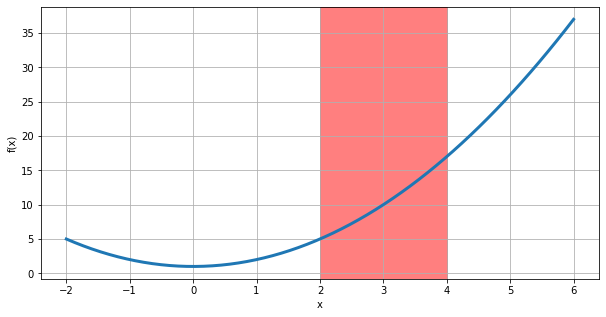

In [25]:
x=np.linspace(-2,6,60)
f=x**2+1

plt.figure(figsize=(10,5))
plt.plot(x,f,label='$f^k$', linewidth=3)
plt.axvspan(2, 4, alpha=0.5, color='red')
plt.grid()
plt.xlabel('x'); plt.ylabel('f(x)');

Clearly the wanted optimum is $x^* = 2$ with $p^*= 5$.
#### 5.2.
But still, it is important to use this example to visualize how the dual problem behaves.
Our Lagrange function is:
\begin{equation}
L(x,\lambda)=x^2+1+\lambda.(x-2)(x-4)
\end{equation}

We can visualize the $L(x,\lambda)$ in the next plot.

In [28]:
def lagrangian(x,l):
    return x**2+1+l*(x-2)*(x-4);

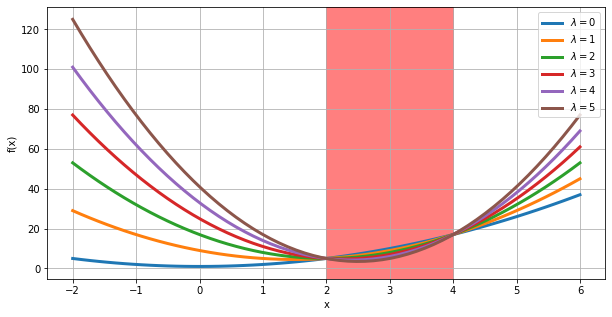

In [41]:
plt.figure(figsize=(10,5))
for ll in range(6):
    plt.plot(x,lagrangian(x,ll),label=f'$\lambda={ll}$', linewidth=3)

plt.axvspan(2, 4, alpha=0.5, color='red')
plt.grid(); plt.legend(loc='upper right')
plt.xlabel('x'); plt.ylabel('f(x)');

The primal problem is $\lambda=0$. And we can verify the lower bound property.
The dual Lagrange function $g$:
\begin{equation}
g(\lambda)=\inf_{x} \{x^2+1+\lambda.(x-2)(x-4) \}
\end{equation}
Before finding the infimum lets rewrite $L(x,\lambda)$:
\begin{equation}
L(x,\lambda)=x^2+1+\lambda.(x-2)(x-4)
\end{equation}
\begin{equation}
L(x,\lambda)=x^2+1+\lambda.(x^2-6x+8)
\end{equation}
\begin{equation}
L(x,\lambda)=(1+\lambda)x^2-\lambda 6x+\lambda 8+1
\end{equation}
Now $\nabla_x L$ is:
\begin{equation}
\nabla_x L=2(1+\lambda)x-\lambda 6
\end{equation}
\begin{equation}
0=2(1+\lambda)x-\lambda 6
\end{equation}
\begin{equation}
x^* =\frac{\lambda 3}{1+\lambda}
\end{equation}

\begin{equation}
   g(\lambda)=   \left\{
\begin{array}{ll}
       \frac{-9\lambda^2}{1+\lambda}+8\lambda+1 & \lambda >-1 \\
      -\infty &  \lambda \leq -1\\
\end{array} 
\right.  
\end{equation}


In [45]:
def dual(l):
    return -9*(l**2)/(1+l)+8*l+1;

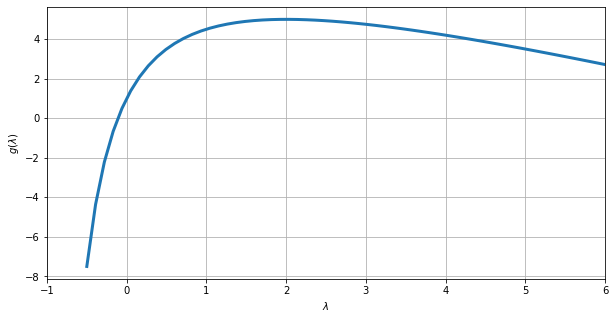

In [49]:
lambd=np.linspace(-0.5,6,60)

plt.figure(figsize=(10,5))
plt.plot(lambd,dual(lambd),label='$g(\lambda)$', linewidth=3)
plt.grid(); plt.xlim((-1,6))
plt.xlabel('$\lambda$'); plt.ylabel('$g(\lambda)$');

#### 5.3.
Finally the dual problem is:
\begin{equation}
\max_{\lambda > -1} \frac{-9\lambda^2}{1+\lambda}+8\lambda+1
\end{equation}
Which leads to $\lambda^* =2$ and $d^* =5$ thus showing __strong__ duality.

### 6.
We need to solve the following quadratic problem:
\begin{equation}
\min \frac{1}{2}x^T P x+q^T x
\end{equation}
\begin{equation}
Ax \leq b
\end{equation}

Its Lagrange function is:
\begin{equation}
L(x,\lambda)= \frac{1}{2}x^T P x+q^T x + \lambda(Ax-b)
\end{equation}
\begin{equation}
= \frac{1}{2}x^T P x+x^T (q + A\lambda)- b^T \lambda
\end{equation}
The dual $g(\lambda)$ is:
\begin{equation}
g(\lambda)=\min_{x} L
\end{equation}

we proceed to derive the gradient with respect to $x$:
\begin{equation}
    \nabla_x L= P x +(A\lambda+q)
\end{equation}
\begin{equation}
    x^* = -P^{-1}(A\lambda+q)
\end{equation}

Substituting we get the explicit expression of $g$:
\begin{equation}
    g(\lambda)=\frac{1}{2}(-P^{-1}(A\lambda+q))^T P (-P^{-1}(A\lambda+q))+(-P^{-1}(A\lambda+q))^T (q + A\lambda)- b^T \lambda
\end{equation}
\begin{equation}
    g(\lambda)=-\frac{1}{2}(A\lambda+q))^T P^{-1} (A\lambda+q)- b^T \lambda
\end{equation}
Thus the dual problem maximizes $g$ for nonnegative values of $\lambda$:
\begin{equation}
\min_{\lambda\geq 0} -\frac{1}{2}(A\lambda+q))^T P^{-1} (A\lambda+q)- b^T \lambda
\end{equation}

This dual problem may solved using ADMM, as follows:
\begin{equation}
    \lambda^{k+1}=argmax(f(\lambda)+\rho/2||x-z^k+u^k||^2_2)
\end{equation}
\begin{equation}
    z^{k+1}=(\lambda^{k+1}+u^{k})_{+}
\end{equation}
\begin{equation}
    u^{k+1}=u^{k}+\lambda^{k+1}-z^{k+1}
\end{equation}

The optimallity conditions for the update are:
\begin{equation}
    (P+\rho.I).\lambda^{k+1}+A^T.\nu+q-\rho(z^k-u^k)=0
\end{equation}
\begin{equation}
    A.\lambda^{k+1}-b=0
\end{equation}

Finally, the problem is:
\begin{equation}
\max b^T \lambda-\frac{1}{2}x^T P_x
\end{equation}
\begin{equation}
 P_x+g-A^T \lambda=0
\end{equation}
from which we can directly extract $h(.)$ and $g(.)$ as required:
\begin{equation}
g(.)= -b^T \lambda
\end{equation}
\begin{equation}
h(.)= \frac{1}{2}x^T P_x
\end{equation}

